In [40]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configurar seed para reproducibilidad
np.random.seed(42)

In [41]:
# Cargar el dataset de vinos tintos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, sep=';')

print("Dataset cargado exitosamente!")
print(f"Dimensiones del dataset: {wine_data.shape}")
print(f"\nColumnas del dataset:")
print(wine_data.columns.tolist())

Dataset cargado exitosamente!
Dimensiones del dataset: (1599, 12)

Columnas del dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [42]:
# Mostrar las primeras filas del dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [43]:
print("Información del dataset:")
print(wine_data.info())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [44]:
print("Descripción estadística del dataset:")
print(wine_data.describe().T)


Descripción estadística del dataset:
                       count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                          

In [45]:
print("Valores nulos por columna:")
print(wine_data.isnull().sum())

Valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


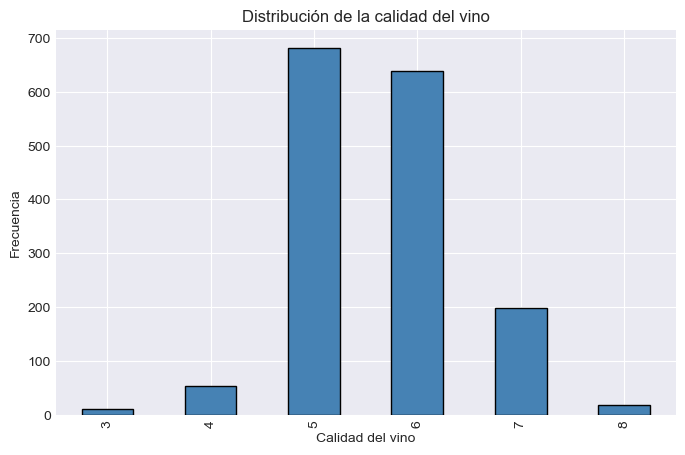

Media calidad: 5.6360225140712945
Mediana calidad: 6.0
Desviación estándar: 0.8075694397347023


In [46]:
plt.figure(figsize=(8, 5))
wine_data['quality'].value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Calidad del vino')
plt.ylabel('Frecuencia')
plt.title('Distribución de la calidad del vino')
plt.show()

print("Media calidad:", wine_data['quality'].mean())
print("Mediana calidad:", wine_data['quality'].median())
print("Desviación estándar:", wine_data['quality'].std())

In [47]:
correlation_matrix = wine_data.corr()
print("\nMatriz de correlación:")
print(correlation_matrix.round(3))


Matriz de correlación:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                 1.000            -0.256        0.672   
volatile acidity             -0.256             1.000       -0.552   
citric acid                   0.672            -0.552        1.000   
residual sugar                0.115             0.002        0.144   
chlorides                     0.094             0.061        0.204   
free sulfur dioxide          -0.154            -0.011       -0.061   
total sulfur dioxide         -0.113             0.076        0.036   
density                       0.668             0.022        0.365   
pH                           -0.683             0.235       -0.542   
sulphates                     0.183            -0.261        0.313   
alcohol                      -0.062            -0.202        0.110   
quality                       0.124            -0.391        0.226   

                      residual sugar  chlorides  free sulfur diox

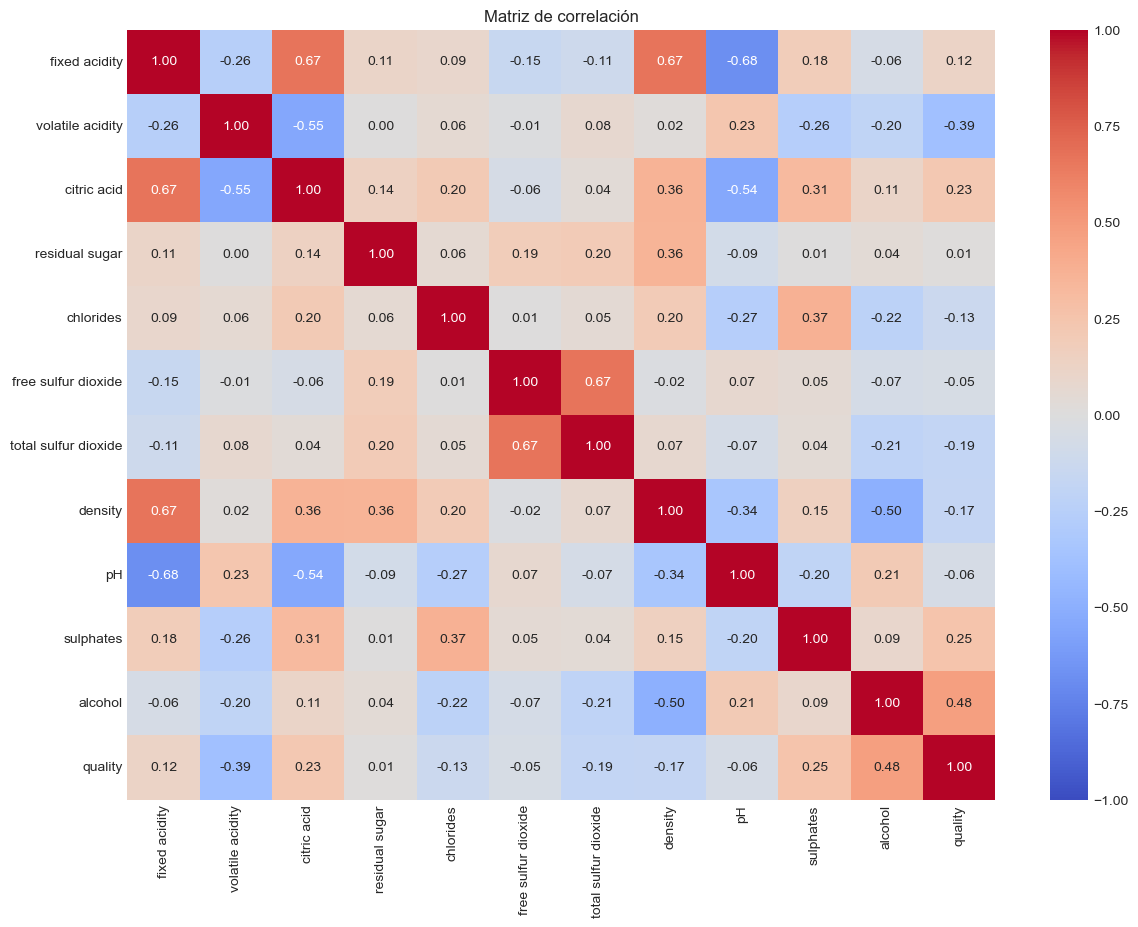

In [48]:
# Visualización de la matriz de correlación
plt.figure(figsize=(14, 10))
corr = wine_data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación')
plt.show()


In [49]:
# Análisis de correlaciones con la variable 'quality'
print("=" * 60)
print("CORRELACIONES CON LA CALIDAD DEL VINO")
print("=" * 60)

# Obtener variables más correlacionadas con quality (orden descendente por valor absoluto)
corr_with_target = corr['quality'].drop('quality').abs().sort_values(ascending=False)
print("Variables más correlacionadas con quality:")
print(corr_with_target.head(5))

CORRELACIONES CON LA CALIDAD DEL VINO
Variables más correlacionadas con quality:
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
Name: quality, dtype: float64


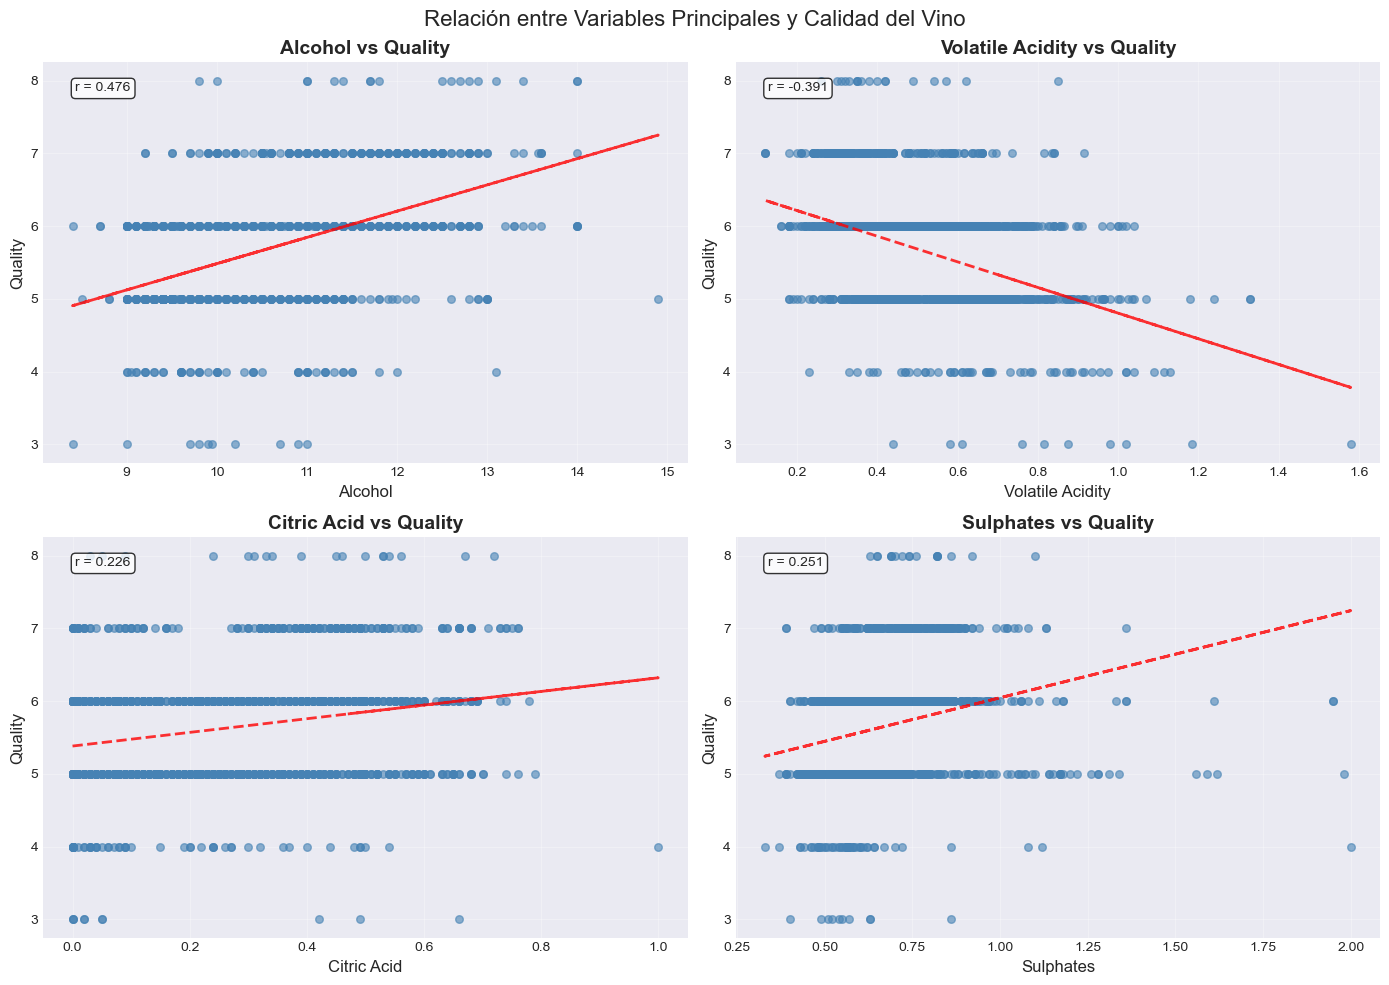

In [50]:
# Visualizar las 4 variables más correlacionadas con quality
top_features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relación entre Variables Principales y Calidad del Vino', fontsize=16)

for idx, (ax, feature) in enumerate(zip(axes.flat, top_features)):
    # Crear scatter plot para cada variable vs quality
    ax.scatter(wine_data[feature], wine_data['quality'], alpha=0.6, s=30, color='steelblue')
    
    # Agregar línea de tendencia usando regresión lineal
    z = np.polyfit(wine_data[feature], wine_data['quality'], 1)
    p = np.poly1d(z)
    ax.plot(wine_data[feature], p(wine_data[feature]), "r--", alpha=0.8, linewidth=2)
    
    # Configurar el subplot
    ax.set_xlabel(feature.title(), fontsize=12)
    ax.set_ylabel('Quality', fontsize=12)
    ax.set_title(f'{feature.title()} vs Quality', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    # Calcular y mostrar el coeficiente de correlación
    corr = wine_data[feature].corr(wine_data['quality'])
    ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes, 
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8),
            fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()

In [51]:
# Separar características (X) y variable objetivo (y)
X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)
print("Tamaño train:", X_train.shape, "Tamaño test:", X_test.shape)

Tamaño train: (1279, 11) Tamaño test: (320, 11)


In [52]:
# Estandarización de características para Ridge y Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Media de X_train_scaled: {np.mean(X_train_scaled):.4f}")
print(f"Desviación estándar de X_train_scaled: {np.std(X_train_scaled):.4f}")

Media de X_train_scaled: 0.0000
Desviación estándar de X_train_scaled: 1.0000


In [53]:
def manual_cv_ridge(X, y, alpha, n_folds=5):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    rmses = []
    for train_idx, val_idx in kf.split(X):
        Xt = X[train_idx]
        Xv = X[val_idx]
        yt = y.iloc[train_idx]
        yv = y.iloc[val_idx]
        # escalar dentro de cada fold
        sc = StandardScaler()
        Xt_s = sc.fit_transform(Xt)
        Xv_s = sc.transform(Xv)
        model = Ridge(alpha=alpha)
        model.fit(Xt_s, yt)
        yv_pred = model.predict(Xv_s)
        rmses.append(np.sqrt(mean_squared_error(yv, yv_pred)))
    return np.mean(rmses), np.std(rmses)

alphas_to_test = [0.001, 0.01, 0.1, 1, 10, 100]
print("Validación cruzada manual para Ridge:")
for a in alphas_to_test:
    mu, sd = manual_cv_ridge(X_train_scaled, y_train, a)
    print(f"alpha={a:.3f} → RMSE = {mu:.4f} ± {sd:.4f}")

Validación cruzada manual para Ridge:
alpha=0.001 → RMSE = 0.6618 ± 0.0136
alpha=0.010 → RMSE = 0.6618 ± 0.0136
alpha=0.100 → RMSE = 0.6618 ± 0.0136
alpha=1.000 → RMSE = 0.6617 ± 0.0136
alpha=10.000 → RMSE = 0.6612 ± 0.0135
alpha=100.000 → RMSE = 0.6599 ± 0.0139


In [54]:
alphas = np.logspace(-3, 3, 50)
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)
best_alpha_ridgecv = ridge_cv.alpha_
print("RidgeCV mejor alpha:", best_alpha_ridgecv)

RidgeCV mejor alpha: 79.06043210907701


In [55]:
pipe = Pipeline([('model', Ridge())])
param_grid = {'model__alpha': alphas}
grid_ridge = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_ridge.fit(X_train_scaled, y_train)
best_alpha_ridge = grid_ridge.best_params_['model__alpha']
best_rmse_cv_ridge = np.sqrt(-grid_ridge.best_score_)
print(f"Ridge con GridSearchCV: mejor alpha = {best_alpha_ridge}, RMSE CV = {best_rmse_cv_ridge:.4f}")

Ridge con GridSearchCV: mejor alpha = 79.06043210907701, RMSE CV = 0.6623


In [56]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_train_lr = lr.predict(X_train_scaled)
y_pred_test_lr = lr.predict(X_test_scaled)
rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_pred_train_lr))
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_pred_test_lr))
r2_lr_train = r2_score(y_train, y_pred_train_lr)
r2_lr_test = r2_score(y_test, y_pred_test_lr)
mae_lr_test = mean_absolute_error(y_test, y_pred_test_lr)
print("LinearRegression → RMSE train:", rmse_lr_train, "RMSE test:", rmse_lr_test)

LinearRegression → RMSE train: 0.6512995910592837 RMSE test: 0.624519930798013


In [57]:
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(X_train_scaled, y_train)
y_pred_train_ridge = ridge_best.predict(X_train_scaled)
y_pred_test_ridge = ridge_best.predict(X_test_scaled)
rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))
r2_ridge_train = r2_score(y_train, y_pred_train_ridge)
r2_ridge_test = r2_score(y_test, y_pred_test_ridge)
mae_ridge_test = mean_absolute_error(y_test, y_pred_test_ridge)
print("Ridge -> RMSE train:", rmse_ridge_train, "RMSE test:", rmse_ridge_test)

Ridge -> RMSE train: 0.6518445124301854 RMSE test: 0.6260987512596466


In [58]:
alphas_lasso = np.logspace(-3, 1, 50)
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)
best_alpha_lasso = lasso_cv.alpha_
print("LassoCV mejor alpha:", best_alpha_lasso)
y_pred_train_lasso = lasso_cv.predict(X_train_scaled)
y_pred_test_lasso = lasso_cv.predict(X_test_scaled)
rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))
r2_lasso_train = r2_score(y_train, y_pred_train_lasso)
r2_lasso_test = r2_score(y_test, y_pred_test_lasso)
mae_lasso_test = mean_absolute_error(y_test, y_pred_test_lasso)
print("Lasso → RMSE train:", rmse_lasso_train, "RMSE test:", rmse_lasso_test)
coef_lasso = pd.Series(lasso_cv.coef_, index=X.columns)
print("Coeficientes Lasso (cero significa eliminado):")
print(coef_lasso[coef_lasso == 0.0])

LassoCV mejor alpha: 0.0079060432109077
Lasso → RMSE train: 0.6520837558367562 RMSE test: 0.6265482868441172
Coeficientes Lasso (cero significa eliminado):
citric acid      -0.0
residual sugar    0.0
density          -0.0
dtype: float64


             Modelo  RMSE Train  RMSE Test  R2 Train   R2 Test  MAE Test
0  LinearRegression    0.651300   0.624520  0.347993  0.403180  0.503530
1             Ridge    0.651845   0.626099  0.346901  0.400159  0.506207
2             Lasso    0.652084   0.626548  0.346422  0.399297  0.506900


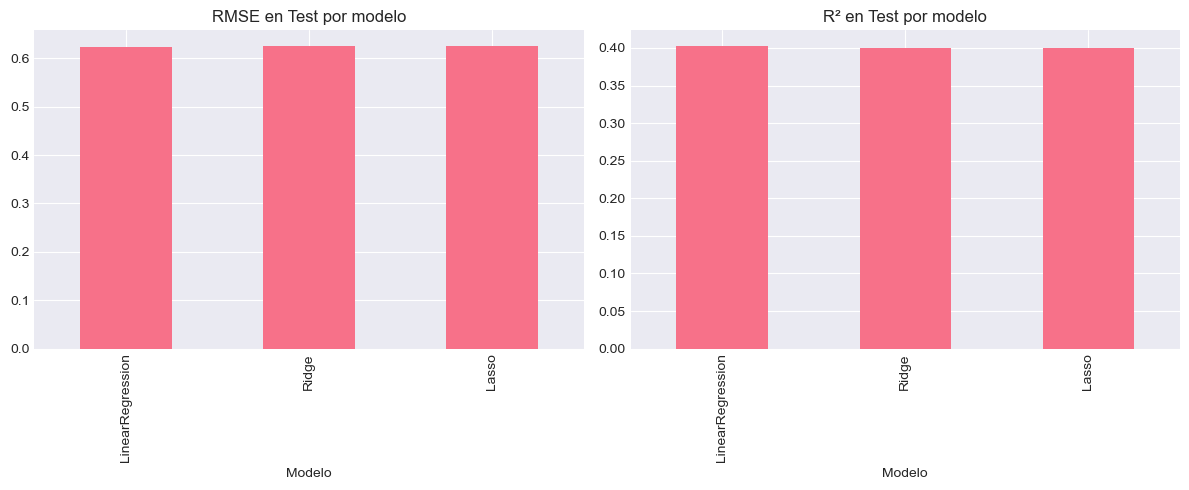

In [59]:
# Crear tabla comparativa
comparison = pd.DataFrame({
    'Modelo': ['LinearRegression', 'Ridge', 'Lasso'],
    'RMSE Train': [rmse_lr_train, rmse_ridge_train, rmse_lasso_train],
    'RMSE Test': [rmse_lr_test, rmse_ridge_test, rmse_lasso_test],
    'R2 Train': [r2_lr_train, r2_ridge_train, r2_lasso_train],
    'R2 Test': [r2_lr_test, r2_ridge_test, r2_lasso_test],
    'MAE Test': [mae_lr_test, mae_ridge_test, mae_lasso_test]
})
print(comparison)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
comparison.plot.bar(x='Modelo', y='RMSE Test', ax=ax[0], legend=False)
ax[0].set_title('RMSE en Test por modelo')
comparison.plot.bar(x='Modelo', y='R2 Test', ax=ax[1], legend=False)
ax[1].set_title('R² en Test por modelo')
plt.tight_layout()
plt.show()

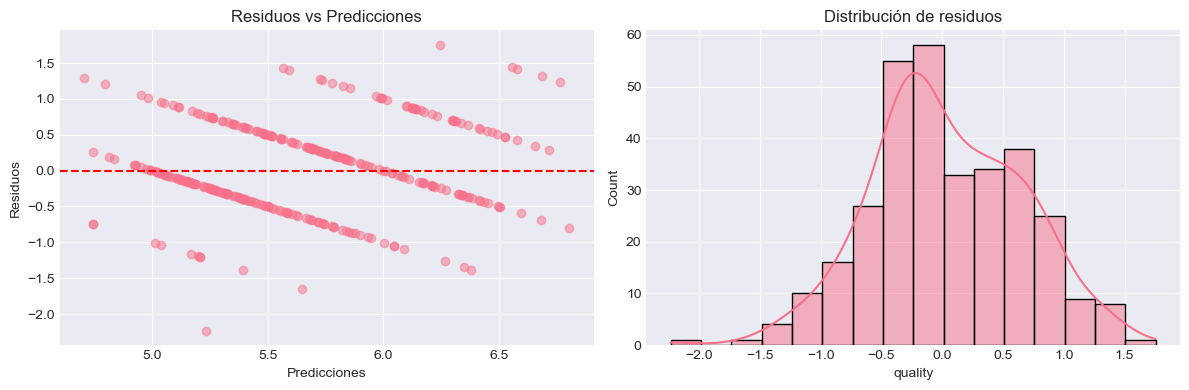

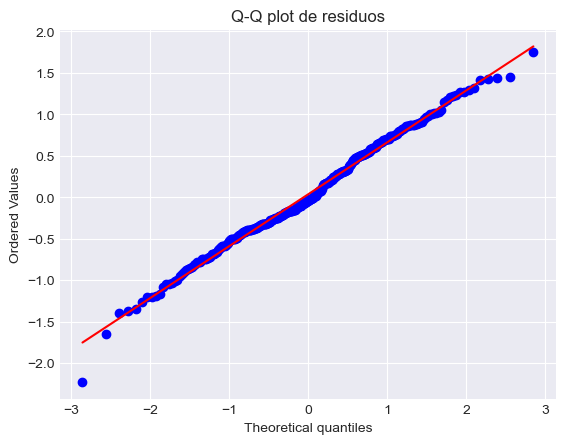

In [61]:
best_model = lr 
y_pred_best = best_model.predict(X_test_scaled)
residuals = y_test - y_pred_best

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_pred_best, residuals, alpha=0.5)
plt.axhline(0, color='red', ls='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Residuos vs Predicciones')

plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.title('Distribución de residuos')
plt.tight_layout()
plt.show()

import scipy.stats as stats
plt.figure()
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot de residuos')
plt.show()

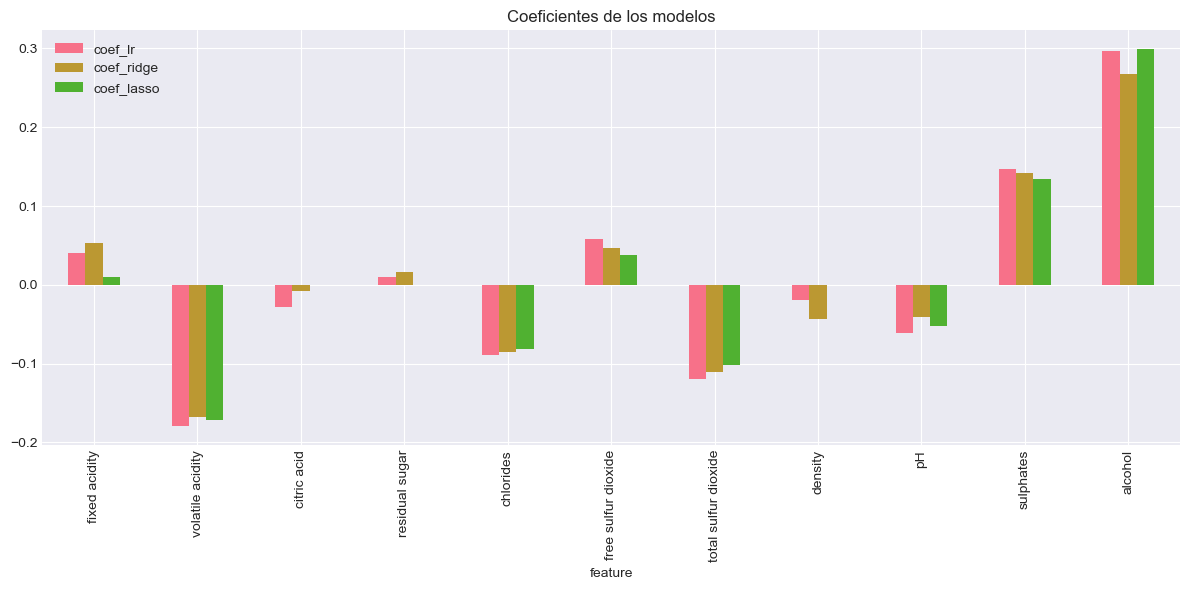

In [62]:
coefs = pd.DataFrame({
    'feature': X.columns,
    'coef_lr': lr.coef_,
    'coef_ridge': ridge_best.coef_,
    'coef_lasso': lasso_cv.coef_
})
coefs = coefs.set_index('feature')
coefs.plot(kind='bar', figsize=(12, 6))
plt.title('Coeficientes de los modelos')
plt.tight_layout()
plt.show()


In [ ]:
cv_final = KFold(n_splits=10, shuffle=True, random_state=42)
rmse_list = []
for train_idx, val_idx in cv_final.split(X_train_scaled):
    Xt = X_train_scaled[train_idx]
    Xv = X_train_scaled[val_idx]
    yt = y_train.iloc[train_idx]
    yv = y_train.iloc[val_idx]
    model = LinearRegression()
    model.fit(Xt, yt)
    y_pred_cv = model.predict(Xv)
    rmse_list.append(np.sqrt(mean_squared_error(yv, y_pred_cv)))
print("Validación cruzada final (k=10): RMSE medio =",
      np.mean(rmse_list), ", std = ", np.std(rmse_list))

Validación cruzada final (k=10): RMSE medio = 0.6600132879171828 , std =  0.03212067586466011
